In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
csv_file_path = 'output_original_data.csv'
# 讀取 CSV 檔案並轉換成 DataFrame
original_data = pd.read_csv(csv_file_path)
original_data

,date,stock_id,CLOSE_O,close,open,high,low,volume,ht_dcperiod,ht_dcphase,...,trange,ad,adosc,obv,cash_buy,cash_sell,TW_open,TW_high,TW_low,TW_close
0,2012-05-18,2330,81.8,56.58,58.68,58.68,56.58,57620539,16.884669,293.866862,...,2.28,1.072926e+09,-1.439889e+07,7.872773e+08,29.185,29.727,7252.240234,7253.100098,7149.359863,7151.189941
1,2012-05-22,2330,82.2,56.85,57.35,57.55,56.85,33977797,16.178534,-23.812457,...,0.70,1.060558e+09,-2.246550e+07,7.857143e+08,29.210,29.752,7257.959961,7274.890137,7232.520020,7274.890137
2,2012-05-23,2330,79.1,54.71,56.61,56.81,54.61,63269956,16.031522,-4.218124,...,2.24,1.003040e+09,-4.246989e+07,7.224444e+08,29.160,29.702,7213.600098,7213.600098,7130.520020,7147.750000
3,2012-05-24,2330,80.6,55.75,54.05,55.75,53.25,40984054,16.076772,-0.812116,...,2.50,1.044024e+09,-3.375222e+07,7.634284e+08,29.190,29.732,7155.740234,7190.549805,7090.470215,7124.890137
4,2012-05-25,2330,80.0,55.33,55.13,55.83,54.53,28279141,16.356346,-2.029960,...,1.30,1.050550e+09,-2.504108e+07,7.351493e+08,29.240,29.782,7116.330078,7139.759766,7066.390137,7071.629883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168855,2024-07-12,2383,470.0,470.00,492.00,493.00,470.00,7815616,25.537477,178.990377,...,30.00,-8.454861e+08,-2.612652e+06,1.303426e+09,32.110,32.780,23955.669922,24045.730469,23774.220703,23916.929688
168856,2024-07-16,2383,474.5,474.50,475.00,480.00,471.00,2575873,27.465694,191.133868,...,10.00,-8.456741e+08,-3.585815e+06,1.306002e+09,32.175,32.845,23880.330078,24174.179688,23861.769531,23997.250000
168857,2024-07-17,2383,462.0,462.00,474.00,475.00,461.50,5034091,27.781844,198.018710,...,13.50,-8.503353e+08,-4.821849e+06,1.300967e+09,32.225,32.895,23827.269531,23993.679688,23650.939453,23769.820312
168858,2024-07-18,2383,447.5,447.50,450.00,451.00,441.00,4973436,27.493187,208.728958,...,21.00,-8.488432e+08,-4.414411e+06,1.295994e+09,32.215,32.885,23373.009766,23450.910156,23148.740234,23398.470703


In [3]:
original_data.columns[3:]

Index(['close', 'open', 'high', 'low', 'volume', 'ht_dcperiod', 'ht_dcphase',
       'inphase', 'quadrature', 'sine',
       ...
       'trange', 'ad', 'adosc', 'obv', 'cash_buy', 'cash_sell', 'TW_open',
       'TW_high', 'TW_low', 'TW_close'],
      dtype='object', length=117)

In [4]:
ss = MinMaxScaler()

feature_names = list(original_data.columns[3:])

df_feature= ss.fit_transform(original_data[feature_names])

df_feature = pd.DataFrame(df_feature, index=original_data.index, columns=feature_names)
df_feature["stock_id"] = original_data['stock_id'].copy()
df_feature["close_o"] = original_data['CLOSE_O'].copy()
df_feature["date"] = original_data['date'].copy()
original_data = df_feature
original_data

,close,open,high,low,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,obv,cash_buy,cash_sell,TW_open,TW_high,TW_low,TW_close,stock_id,close_o,date
0,0.010860,0.011279,0.011072,0.010950,0.044953,0.179148,0.941329,0.605676,0.416853,0.042756,...,0.050049,0.877088,0.878994,0.018493,0.013640,0.013154,0.010362,2330,81.8,2012-05-18
1,0.010915,0.011011,0.010848,0.011005,0.026508,0.160307,0.058851,0.605936,0.415674,0.298128,...,0.049995,0.877815,0.879709,0.018824,0.014892,0.017981,0.017463,2330,82.2,2012-05-22
2,0.010484,0.010862,0.010701,0.010551,0.049360,0.156385,0.113282,0.605189,0.415465,0.463223,...,0.047805,0.876362,0.878279,0.016261,0.011370,0.012060,0.010165,2330,79.1,2012-05-23
3,0.010693,0.010347,0.010491,0.010275,0.031974,0.157592,0.122744,0.605084,0.415767,0.492913,...,0.049224,0.877234,0.879137,0.012919,0.010045,0.009736,0.008852,2330,80.6,2012-05-24
4,0.010609,0.010565,0.010507,0.010534,0.022062,0.165052,0.119361,0.604803,0.415431,0.482289,...,0.048245,0.878687,0.880568,0.010642,0.007126,0.008338,0.005795,2330,80.0,2012-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168855,0.094036,0.098459,0.097158,0.094798,0.006097,0.410019,0.622215,0.628329,0.416952,0.508810,...,0.067915,0.962080,0.966330,0.983457,0.978683,0.978085,0.972841,2383,470.0,2024-07-12
168856,0.094942,0.095039,0.094581,0.095001,0.002010,0.461467,0.655948,0.616718,0.397634,0.403449,...,0.068005,0.963969,0.968189,0.979104,0.986065,0.983166,0.977452,2383,474.5,2024-07-16
168857,0.092427,0.094837,0.093590,0.093074,0.003927,0.469902,0.675073,0.613525,0.392335,0.345336,...,0.067830,0.965422,0.969620,0.976039,0.975691,0.970929,0.964395,2383,462.0,2024-07-17
168858,0.089510,0.090009,0.088833,0.088917,0.003880,0.462200,0.704825,0.602274,0.375239,0.259667,...,0.067658,0.965131,0.969334,0.949796,0.944499,0.941781,0.943077,2383,447.5,2024-07-18


In [8]:
data_tcn_train = np.zeros((1, 20, 117), dtype=np.float64)
data_tcn_valid = np.zeros((1, 20, 117), dtype=np.float64)
data_tcn_predict = np.zeros((1, 20, 117), dtype=np.float64)

TRAIN_START_DATE = '2013/01/01'
TRAIN_END_DATE = '2020/11/13'
VALID_START_DATE = '2020/10/16' #2020/11/14開始
VALID_END_DATE = '2021/11/14'
PREDICT_START_DATE = '2021/10/15' #2021/11/14開始
PREDICT_END_DATE = '2024/12/31' 

target_date_col="date"
# 根据日期篩選數據
original_data[target_date_col] = pd.to_datetime(original_data[target_date_col])
tcn_train = original_data[(original_data[target_date_col] >= TRAIN_START_DATE) & (original_data[target_date_col] < TRAIN_END_DATE)]
tcn_valid = original_data[(original_data[target_date_col] >= VALID_START_DATE) & (original_data[target_date_col] < VALID_END_DATE)]
tcn_predict = original_data[(original_data[target_date_col] >= PREDICT_START_DATE) & (original_data[target_date_col] < PREDICT_END_DATE)]

unique_stock_ids = original_data['stock_id'].unique()


coding_tcn_20_train = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                            'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                            'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                            'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                            'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_valid = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                            'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                            'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                            'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                            'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_predict = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                              'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                              'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                              'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                              'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])

    
for stock_id in unique_stock_ids:
    
    df_SIN = tcn_train[tcn_train['stock_id'] == stock_id]
    df_SIN_valid = tcn_valid[tcn_valid['stock_id'] == stock_id]
    df_SIN_predict = tcn_predict[tcn_predict['stock_id'] == stock_id]
    
    data_stock = np.zeros((len(df_SIN) - 19, 20, 117), dtype=np.float64)
    data_stock_valid = np.zeros((len(df_SIN_valid) - 19, 20, 117), dtype=np.float64)
    data_stock_predict = np.zeros((len(df_SIN_predict) - 19, 20, 117), dtype=np.float64)
    

    tcn_20_train = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                         'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                         'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                         'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                         'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
    tcn_20_valid = pd.DataFrame(columns=['date', 'stock_id', 'close', 
                                         'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                         'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                         'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                         'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
    tcn_20_predict = pd.DataFrame(columns=['date', 'stock_id', 'close',
                                           'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                           'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                           'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                           'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])

    tcn_20_train['date'] = df_SIN['date'][19:]  
    tcn_20_train['stock_id'] = df_SIN['stock_id'][19:] 
    tcn_20_train['close'] = df_SIN['close_o'][19:] 

    tcn_20_valid['date'] = df_SIN_valid['date'][19:] 
    tcn_20_valid['stock_id'] = df_SIN_valid['stock_id'][19:]  
    tcn_20_valid['close'] = df_SIN_valid['close_o'][19:]
    
    tcn_20_predict['date'] = df_SIN_predict['date'][19:] 
    tcn_20_predict['stock_id'] = df_SIN_predict['stock_id'][19:] 
    tcn_20_predict['close'] = df_SIN_predict['close_o'][19:]  
        
    for i in range(len(df_SIN) - 19):
        subset_data = df_SIN.iloc[i:i+20, :117].values
        data_stock[i] = subset_data
        id_close_train = df_SIN.iloc[i:i+20]

    for i in range(len(df_SIN_valid) - 19):
        subset_data_valid = df_SIN_valid.iloc[i:i+20, :117].values
        data_stock_valid[i] = subset_data_valid
        id_close_valid = df_SIN[i:i+20]
        
    for i in range(len(df_SIN_predict) - 19):
        subset_data_predict = df_SIN_predict.iloc[i:i+20, :117].values
        data_stock_predict[i] = subset_data_predict
        id_close_predict = df_SIN[i:i+20]
        

    #TCN訓練資料
    data_tcn_train = np.concatenate((data_tcn_train, data_stock), axis=0)
    data_tcn_valid = np.concatenate((data_tcn_valid, data_stock_valid), axis=0)
    data_tcn_predict = np.concatenate((data_tcn_predict, data_stock_predict), axis=0)

    #組合TCN的壓縮資料, 包含stock_id, date, close
    coding_tcn_20_train = np.concatenate((coding_tcn_20_train, tcn_20_train), axis=0)
    coding_tcn_20_valid = np.concatenate((coding_tcn_20_valid, tcn_20_valid), axis=0)
    coding_tcn_20_predict = np.concatenate((coding_tcn_20_predict, tcn_20_predict), axis=0)

# 将列表转换为 NumPy 数组
data_tcn_train = np.array(data_tcn_train)
data_tcn_valid = np.array(data_tcn_valid)
data_tcn_predict = np.array(data_tcn_predict)

#過濾第一行是0的部分
data_tcn_train = data_tcn_train[1:]
data_tcn_valid = data_tcn_valid[1:]
data_tcn_predict = data_tcn_predict[1:]
# 输出结果
print(data_tcn_train.shape)
print(data_tcn_valid.shape)
print(data_tcn_predict.shape)


(107114, 20, 117)
(13875, 20, 117)
(36942, 20, 117)


In [9]:
coding_tcn_20_train_df = pd.DataFrame(coding_tcn_20_train, columns=['date', 'stock_id', 'close', 
                                                                   'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                                                   'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                                                   'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                                                   'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_valid_df = pd.DataFrame(coding_tcn_20_valid, columns=['date', 'stock_id', 'close', 
                                                                   'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                                                   'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                                                   'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                                                   'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])
coding_tcn_20_predict_df = pd.DataFrame(coding_tcn_20_predict, columns=['date', 'stock_id', 'close', 
                                                                       'coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                                                                       'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                                                                       'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                                                                       'coding16', 'coding17', 'coding18', 'coding19', 'coding20'])


In [12]:
from tcnae import TCNAE # tcnae.py: Specification of the TCN-AE model
from keras.models import load_model

In [13]:
tcn_ae_20 = TCNAE(ts_dimension = 117,verbose = 2,filters_conv1d=20) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
 up_sampling1d (UpSampling1  (None, None, 20)          0         
 D)                                                          

In [14]:
history_tcn_20 =tcn_ae_20.fit(data_tcn_train, data_tcn_train,data_tcn_valid, batch_size=256, epochs=10, verbose=2 )

> Starting the Training...
Epoch 1/10
419/419 - 510s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0128 - val_mse: 0.0128 - 510s/epoch - 1s/step
Epoch 2/10
419/419 - 512s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0108 - val_mse: 0.0108 - 512s/epoch - 1s/step
Epoch 3/10
419/419 - 510s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0101 - val_mse: 0.0101 - 510s/epoch - 1s/step
Epoch 4/10
419/419 - 507s - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0096 - val_mse: 0.0096 - 507s/epoch - 1s/step
Epoch 5/10
419/419 - 518s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0090 - val_mse: 0.0090 - 518s/epoch - 1s/step
Epoch 6/10
419/419 - 513s - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0087 - val_mse: 0.0087 - 513s/epoch - 1s/step
Epoch 7/10
419/419 - 497s - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0084 - val_mse: 0.0084 - 497s/epoch - 1s/step
Epoch 8/10
419/419 - 510s - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0082 - val_mse: 0.0082 - 510s/epoch - 1s/step
Epoch 9/10
419/419 - 521s - loss: 0.0054 - mse: 0.005

D:\anaconda3\envs\RL-GAT\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


> Training Time : 5118 seconds.


In [15]:
#儲存loss
loss_data = pd.DataFrame({
    'val_loss_tcn_20': history_tcn_20.history['val_loss']
})

loss_data.to_csv('loss_history_20.csv', index=False)

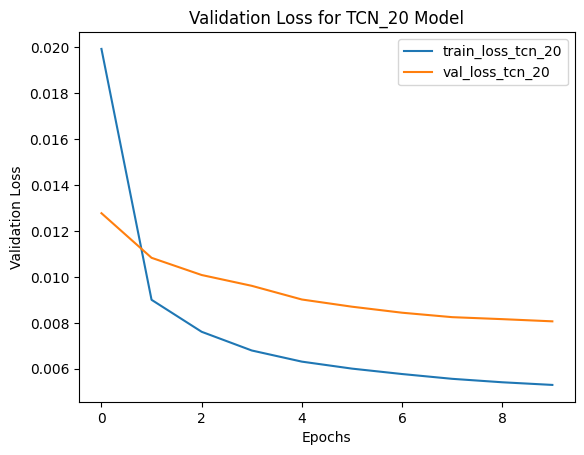

In [17]:
import matplotlib.pyplot as plt

plt.plot(history_tcn_20.history['loss'], label='train_loss_tcn_20')
plt.plot(history_tcn_20.history['val_loss'], label='val_loss_tcn_20')


plt.title('Validation Loss for TCN_20 Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()


plt.savefig('tcn_20_loss_.jpg', format='jpg')


plt.show()

In [18]:
train_20_encoder =  tcn_ae_20.tcn_encoder_train(data_tcn_train)
print("X_encoder.shape", train_20_encoder.shape) # This is one long time series

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
Total params: 515700 (1.97 MB)
Trainable params: 515700 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [19]:
train_20_encoder_reshaped = train_20_encoder.reshape(train_20_encoder.shape[0], 20)

In [20]:
##把encoder的資料放回coding裡面
coding_tcn_20_train_df[['coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                        'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                        'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                        'coding16', 'coding17', 'coding18', 'coding19', 'coding20']] = train_20_encoder_reshaped
coding_tcn_20_train_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2013-02-06,2330,105.0,-0.008212,-0.248126,-0.831677,0.150977,0.667423,0.435182,-0.247856,...,-0.639436,0.607007,-0.659955,0.477205,-0.682616,0.308454,-0.336158,-0.498087,0.027532,1.061607
1,2013-02-19,2330,107.0,-0.143543,-0.280925,-0.824546,0.198453,0.662114,0.364134,-0.282342,...,-0.514785,0.596897,-0.648735,0.344115,-0.739833,0.372720,-0.369665,-0.507513,-0.036159,1.102391
2,2013-02-20,2330,109.0,-0.205818,-0.282473,-0.747203,0.261027,0.592892,0.245398,-0.306238,...,-0.498086,0.594131,-0.694624,0.216194,-0.878292,0.375872,-0.387438,-0.545101,-0.123956,1.158251
3,2013-02-21,2330,107.0,-0.306768,-0.263662,-0.559640,0.408375,0.626378,0.184669,-0.279220,...,-0.561994,0.619216,-0.718437,0.210958,-0.964805,0.365130,-0.340295,-0.610036,-0.108581,1.229878
4,2013-02-22,2330,105.5,-0.465002,-0.229596,-0.337254,0.531135,0.677862,0.206724,-0.240361,...,-0.574719,0.609303,-0.675281,0.237824,-0.989256,0.339820,-0.337490,-0.660595,-0.000544,1.303277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107109,2020-11-05,2383,147.5,0.330296,-0.008352,0.002403,-0.421158,0.226990,-0.330174,-0.719580,...,-0.557241,0.077853,-0.842554,0.472785,-0.631711,0.262184,-1.579329,-0.280103,0.249474,1.256871
107110,2020-11-06,2383,146.5,0.451068,0.006765,-0.052014,-0.171286,0.369588,-0.333801,-0.650550,...,-0.618032,0.153737,-0.834834,0.557032,-0.532280,0.330643,-1.454064,-0.249838,0.279912,1.235605
107111,2020-11-10,2383,147.5,0.445644,0.005285,-0.054468,-0.014411,0.621805,-0.141538,-0.571967,...,-0.656177,0.241370,-0.824634,0.559168,-0.493207,0.427632,-1.289965,-0.150757,0.315987,1.235595
107112,2020-11-11,2383,152.5,0.389646,-0.029574,-0.064374,-0.005739,0.796590,0.064354,-0.565069,...,-0.660738,0.295075,-0.838211,0.451390,-0.543121,0.456004,-1.173729,-0.059031,0.323501,1.218501


In [21]:
valid_20_encoder =  tcn_ae_20.tcn_encoder_train(data_tcn_valid)
print("X_encoder.shape", valid_20_encoder.shape) # This is one long time series

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
Total params: 515700 (1.97 MB)
Trainable params: 515700 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [22]:
valid_20_encoder_reshaped = valid_20_encoder.reshape(valid_20_encoder.shape[0], 20)
coding_tcn_20_valid_df[['coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                        'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                        'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                        'coding16', 'coding17', 'coding18', 'coding19', 'coding20']] = valid_20_encoder_reshaped
coding_tcn_20_valid_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2020-11-19,2330,490.0,-0.612042,0.049663,0.147378,0.123135,0.404955,-0.050823,-0.964276,...,-0.863391,0.508438,-0.979801,0.157406,-0.956767,0.135870,-1.709435,-0.324471,-0.112451,1.584786
1,2020-11-20,2330,488.0,-0.592027,0.154386,0.230517,0.260485,0.359891,-0.221980,-0.855486,...,-0.765610,0.480587,-0.918136,0.144272,-0.906043,0.169103,-1.701026,-0.321434,0.043135,1.673450
2,2020-11-24,2330,492.0,-0.483016,0.220956,0.358716,0.404508,0.406154,-0.281088,-0.740997,...,-0.774685,0.382186,-0.940091,0.125956,-0.885159,0.179142,-1.553777,-0.297897,0.208873,1.760407
3,2020-11-25,2330,487.0,-0.398980,0.308694,0.528366,0.427191,0.461122,-0.261252,-0.634118,...,-0.791304,0.304447,-0.974624,0.099380,-0.885443,0.165604,-1.364868,-0.265962,0.368403,1.826104
4,2020-11-26,2330,489.0,-0.319070,0.338664,0.631065,0.215761,0.447327,-0.225099,-0.621600,...,-0.837198,0.245917,-1.004606,0.008538,-0.915490,0.087093,-1.318305,-0.206027,0.488435,1.793943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13870,2021-11-04,2383,231.5,-0.639007,0.192942,0.524811,0.094879,0.489708,-0.133526,-0.633427,...,-0.510636,0.098490,-0.927502,0.110691,-0.742667,0.545955,-1.668984,-0.329977,0.214360,1.638803
13871,2021-11-05,2383,230.5,-0.493769,0.231782,0.603032,-0.033085,0.358278,-0.236676,-0.649161,...,-0.482393,0.032525,-0.940507,0.102962,-0.824384,0.430944,-1.684867,-0.293349,0.302289,1.647276
13872,2021-11-10,2383,231.0,-0.289912,0.270981,0.601932,-0.108722,0.226725,-0.324756,-0.614871,...,-0.540252,0.001884,-0.938307,0.169482,-0.900960,0.284539,-1.697551,-0.258323,0.360124,1.640945
13873,2021-11-11,2383,229.5,-0.055355,0.297821,0.551406,-0.183139,0.091140,-0.392719,-0.619237,...,-0.600013,-0.021648,-0.980088,0.250857,-0.911252,0.126362,-1.703840,-0.238069,0.406770,1.629874


In [23]:
predict_20_encoder =  tcn_ae_20.tcn_encoder_train(data_tcn_predict)
print("X_encoder.shape", predict_20_encoder.shape) # This is one long time series

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 117)]       0         
                                                                 
 tcn-enc (TCN)               (None, None, 40)          514880    
                                                                 
 conv1d (Conv1D)             (None, None, 20)          820       
                                                                 
 average_pooling1d (Average  (None, None, 20)          0         
 Pooling1D)                                                      
                                                                 
 activation (Activation)     (None, None, 20)          0         
                                                                 
Total params: 515700 (1.97 MB)
Trainable params: 515700 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [24]:
predict_20_encoder_reshaped = predict_20_encoder.reshape(predict_20_encoder.shape[0], 20)
coding_tcn_20_predict_df[['coding1', 'coding2', 'coding3', 'coding4', 'coding5', 
                          'coding6', 'coding7', 'coding8', 'coding9', 'coding10',
                          'coding11', 'coding12', 'coding13', 'coding14', 'coding15',
                          'coding16', 'coding17', 'coding18', 'coding19', 'coding20']] = predict_20_encoder_reshaped
coding_tcn_20_predict_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2021-11-18,2330,613.0,0.010784,-0.371092,-0.177668,-0.142726,0.495204,-0.011781,-1.142384,...,-1.101832,0.307720,-1.428219,0.722802,-0.620579,0.313785,-1.303353,-0.138798,0.114316,1.640224
1,2021-11-19,2330,618.0,-0.164848,-0.376031,-0.153357,-0.151290,0.520008,-0.002112,-1.079956,...,-1.170628,0.340443,-1.307512,0.745338,-0.668400,0.325228,-1.482699,-0.101032,-0.013284,1.595214
2,2021-11-23,2330,612.0,-0.326879,-0.333124,-0.107408,-0.118740,0.477928,-0.037187,-1.061067,...,-1.033437,0.334303,-1.210146,0.692838,-0.630109,0.355927,-1.672378,-0.070703,-0.002226,1.584832
3,2021-11-24,2330,603.0,-0.388099,-0.271151,0.003599,0.016602,0.459158,-0.097325,-1.054800,...,-0.855610,0.263434,-1.150465,0.592939,-0.567205,0.403627,-1.737568,-0.068626,0.024190,1.627143
4,2021-11-25,2330,603.0,-0.333309,-0.190344,0.211881,0.191783,0.529188,-0.223705,-1.009799,...,-0.749344,0.202966,-1.091031,0.509109,-0.604113,0.464823,-1.700062,-0.048150,0.025298,1.676556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36937,2024-07-12,2383,470.0,-0.256649,-0.188847,0.192675,0.092107,0.463496,-0.280881,-1.180423,...,-0.899121,0.262837,-1.423367,0.614060,-0.462352,0.199956,-1.836586,0.145610,0.028369,1.887155
36938,2024-07-16,2383,474.5,-0.232141,-0.138739,0.430192,0.223214,0.574597,-0.289865,-1.175686,...,-0.892325,0.339668,-1.372912,0.622276,-0.486753,0.194989,-1.814901,0.179558,0.036175,1.923985
36939,2024-07-17,2383,462.0,-0.172789,-0.046276,0.667954,0.253313,0.686911,-0.233781,-1.159484,...,-0.915260,0.356252,-1.346368,0.618364,-0.523101,0.154559,-1.754877,0.215066,0.067214,1.924284
36940,2024-07-18,2383,447.5,-0.076783,0.027007,0.819655,0.170681,0.702436,-0.170020,-1.181517,...,-0.892200,0.396613,-1.295589,0.609994,-0.545664,0.080419,-1.768538,0.242017,0.108704,1.882731


In [25]:
combined_df = pd.concat([coding_tcn_20_train_df, coding_tcn_20_valid_df, coding_tcn_20_predict_df], ignore_index=True)
combined_df

,date,stock_id,close,coding1,coding2,coding3,coding4,coding5,coding6,coding7,...,coding11,coding12,coding13,coding14,coding15,coding16,coding17,coding18,coding19,coding20
0,2013-02-06,2330,105.0,-0.008212,-0.248126,-0.831677,0.150977,0.667423,0.435182,-0.247856,...,-0.639436,0.607007,-0.659955,0.477205,-0.682616,0.308454,-0.336158,-0.498087,0.027532,1.061607
1,2013-02-19,2330,107.0,-0.143543,-0.280925,-0.824546,0.198453,0.662114,0.364134,-0.282342,...,-0.514785,0.596897,-0.648735,0.344115,-0.739833,0.372720,-0.369665,-0.507513,-0.036159,1.102391
2,2013-02-20,2330,109.0,-0.205818,-0.282473,-0.747203,0.261027,0.592892,0.245398,-0.306238,...,-0.498086,0.594131,-0.694624,0.216194,-0.878292,0.375872,-0.387438,-0.545101,-0.123956,1.158251
3,2013-02-21,2330,107.0,-0.306768,-0.263662,-0.559640,0.408375,0.626378,0.184669,-0.279220,...,-0.561994,0.619216,-0.718437,0.210958,-0.964805,0.365130,-0.340295,-0.610036,-0.108581,1.229878
4,2013-02-22,2330,105.5,-0.465002,-0.229596,-0.337254,0.531135,0.677862,0.206724,-0.240361,...,-0.574719,0.609303,-0.675281,0.237824,-0.989256,0.339820,-0.337490,-0.660595,-0.000544,1.303277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157926,2024-07-12,2383,470.0,-0.256649,-0.188847,0.192675,0.092107,0.463496,-0.280881,-1.180423,...,-0.899121,0.262837,-1.423367,0.614060,-0.462352,0.199956,-1.836586,0.145610,0.028369,1.887155
157927,2024-07-16,2383,474.5,-0.232141,-0.138739,0.430192,0.223214,0.574597,-0.289865,-1.175686,...,-0.892325,0.339668,-1.372912,0.622276,-0.486753,0.194989,-1.814901,0.179558,0.036175,1.923985
157928,2024-07-17,2383,462.0,-0.172789,-0.046276,0.667954,0.253313,0.686911,-0.233781,-1.159484,...,-0.915260,0.356252,-1.346368,0.618364,-0.523101,0.154559,-1.754877,0.215066,0.067214,1.924284
157929,2024-07-18,2383,447.5,-0.076783,0.027007,0.819655,0.170681,0.702436,-0.170020,-1.181517,...,-0.892200,0.396613,-1.295589,0.609994,-0.545664,0.080419,-1.768538,0.242017,0.108704,1.882731


In [26]:
new_columns = {'stock_id': 'tic'}
combined_df = combined_df.rename(columns=new_columns)

combined_df.to_csv('tcn_daily_trade_info.csv', index=False)